## import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/w_/xmvk9ttj3p7fgkdb0gbjg5yc0000gn/T/ipykernel_50282/2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## preprocessing

In [2]:
data_csv = pd.read_csv("./arxiv_papers.csv")

# add index column
data_csv["index"] = np.arange(1, len(data_csv) + 1)

# (column originally_announced) 2023-01-XX -> 2023-01-01 -> datetime
data_csv["originally_announced"] = data_csv["originally_announced"].str.replace("XX", "01")
data_csv["originally_announced"] = pd.to_datetime(data_csv["originally_announced"])

## plot

decreasing keywords - previous methods (rnn, lstm, gru)  
increasing keywords - keywords that are famous these days, SOTA (reinforcement learning, large language model)

<Axes: xlabel='originally_announced'>

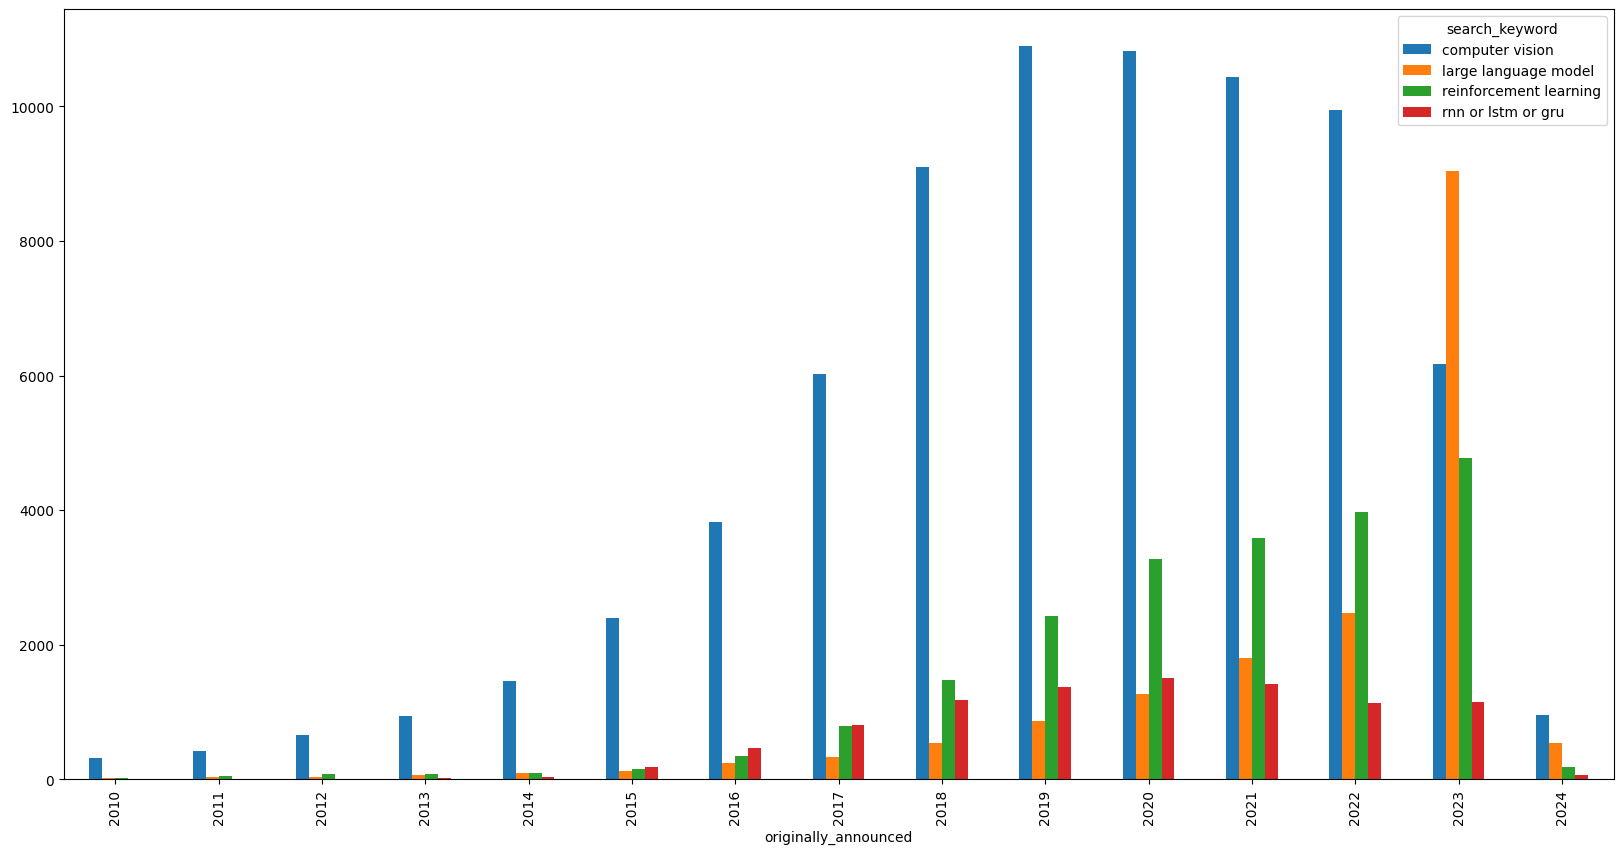

In [5]:
df = data_csv.groupby(["search_keyword", data_csv["originally_announced"].dt.year]).count()["index"].unstack(level=0)
df = df.loc[2010:]
plt.rcParams["figure.figsize"] = (20, 10)
df.plot.bar()